In [3]:
ndf = pd.read_excel('/content/newCVD.xlsx')
ndf

,No,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alchol Intake,Physical Activity,Presence/Absence of CVD
0,1,91,1,175,57,150,85,2,1,1,0,0,0
1,2,24,1,150,45,120,80,1,1,0,0,1,0
2,3,56,1,160,50,110,60,1,1,0,0,1,0
3,4,71,1,170,50,110,60,1,1,1,0,1,0
4,5,48,1,165,65,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,192,83,2,163,55,120,90,1,2,0,0,1,0
192,193,91,2,177,48,130,90,1,1,0,0,1,0
193,194,47,1,167,73,150,115,2,1,0,0,1,0
194,195,58,2,168,49,130,100,1,1,0,0,0,0


In [4]:
ndf['Presence/Absence of CVD'].value_counts()

,count
Presence/Absence of CVD,
0,196


In [5]:
merged_df = pd.concat([df, ndf], ignore_index=True)
df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
df

,No,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alchol Intake,Physical Activity,Presence/Absence of CVD
0,47,42,2,168,55,120,90,1,2,0,0,1,0
1,1500,72,1,170,62,150,115,2,3,1,0,1,1
2,1132,43,1,170,65,140,100,2,1,1,0,1,0
3,8,66,1,172,46,120,80,1,1,1,0,1,0
4,7,39,1,158,52,100,60,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,134,47,2,144,42,130,90,2,2,0,0,0,0
1972,704,69,2,157,54,130,90,1,1,0,0,1,0
1973,228,44,1,182,97,155,115,2,2,1,0,1,1
1974,153,53,1,165,65,100,60,1,1,0,0,0,0


In [7]:
df.to_csv('CVD_data.csv', index=False)

## EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   No                       1976 non-null   int64 
 1   Age                      1976 non-null   int64 
 2   Gender                   1976 non-null   object
 3   Height                   1976 non-null   int64 
 4   Weight                   1976 non-null   int64 
 5   SBP                      1976 non-null   int64 
 6   DBP                      1976 non-null   int64 
 7   Cholesterol              1976 non-null   int64 
 8   Glucose                  1976 non-null   int64 
 9   Smoking                  1976 non-null   int64 
 10  Alchol Intake            1976 non-null   int64 
 11  Physical Activity        1976 non-null   int64 
 12  Presence/Absence of CVD  1976 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 200.8+ KB


In [9]:
df['Presence/Absence of CVD'].value_counts()

,count
Presence/Absence of CVD,
0,1364
1,612


In [10]:
df['Gender'].value_counts()

,count
Gender,
1,904
2,874
2,112
1,84
M,1
F,1


In [11]:
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 2})

df['Gender'].value_counts()

,count
Gender,
1,904
2,874
2,113
1,85


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

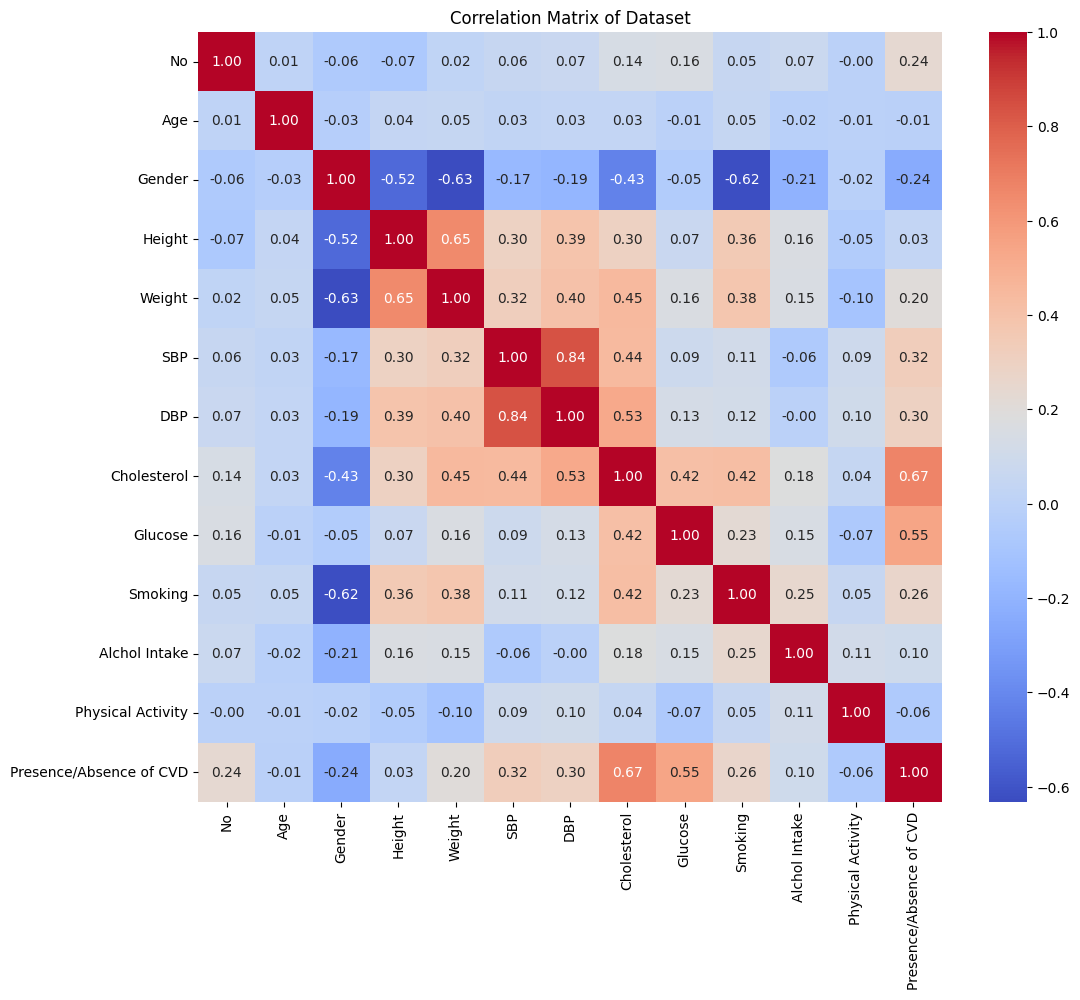

In [13]:
correlation_matrix = df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dataset')
plt.show()

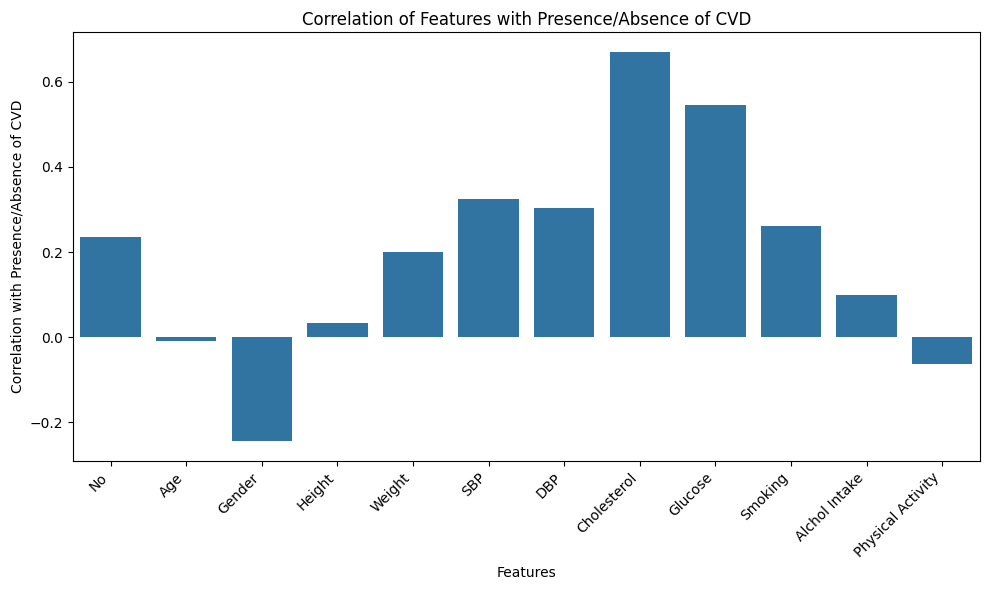

In [14]:
correlations = df.corr()['Presence/Absence of CVD'].drop('Presence/Absence of CVD')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with Presence/Absence of CVD')
plt.title('Correlation of Features with Presence/Absence of CVD')
plt.tight_layout()
plt.show()

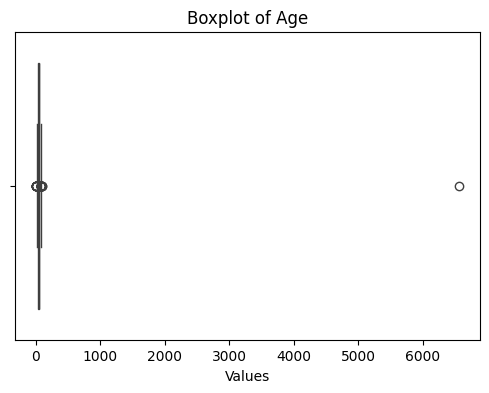

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Values')

plt.show()

In [16]:
top_5_ages = df['Age'].nlargest(5)

top_5_ages

,Age
1039,6556
605,96
1761,96
1501,92
1767,92


In [17]:
df = df[df['Age']<=120]

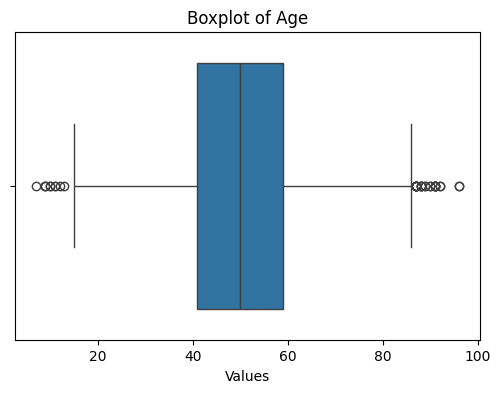

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Values')

plt.show()

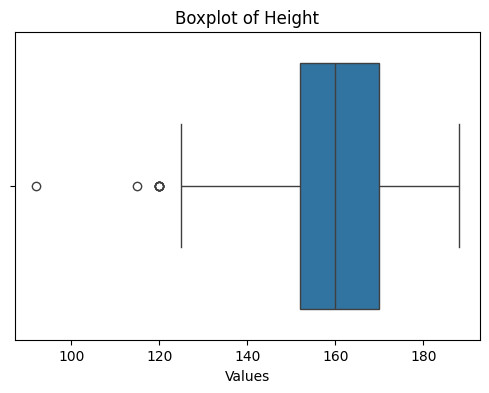

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Height'])
plt.title('Boxplot of Height')
plt.xlabel('Values')

plt.show()

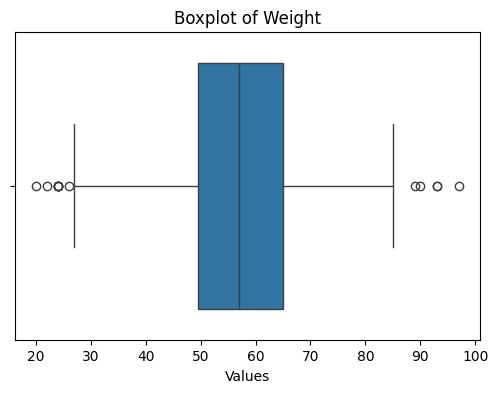

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight'])
plt.title('Boxplot of Weight')
plt.xlabel('Values')

plt.show()

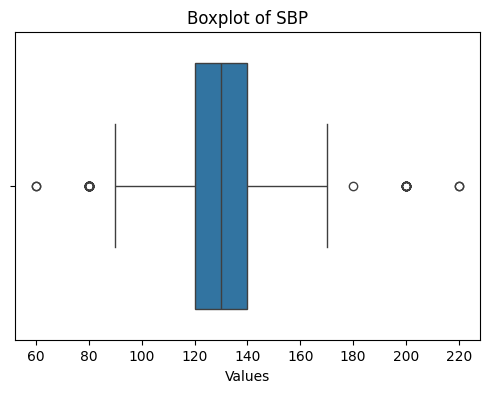

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['SBP'])
plt.title('Boxplot of SBP')
plt.xlabel('Values')

plt.show()

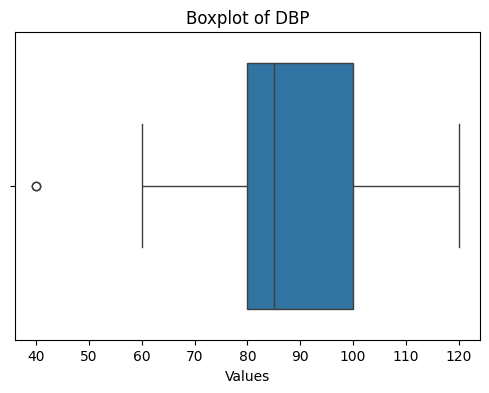

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['DBP'])
plt.title('Boxplot of DBP')
plt.xlabel('Values')

plt.show()

In [23]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
1,1268
2,487
3,220


In [24]:
df['Glucose'].value_counts()

,count
Glucose,
1,1041
2,617
3,317


In [25]:
df['Smoking'].value_counts()

,count
Smoking,
0,1416
1,559


In [26]:
df['Alchol Intake'].value_counts()

,count
Alchol Intake,
0,1892
1,83


In [27]:
df['Physical Activity'].value_counts()

,count
Physical Activity,
1,1525
0,450


## Model Train

In [28]:
pip install scikeras

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [30]:
X = df.drop(['Presence/Absence of CVD', 'No'], axis=1)
y = df['Presence/Absence of CVD']

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={0: 4000, 1: 1000})
X_resampled, y_resampled = smote.fit_resample(X, y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [37]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6574 - loss: 0.6387 - val_accuracy: 0.8703 - val_loss: 0.4257
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8792 - loss: 0.3849 - val_accuracy: 0.8861 - val_loss: 0.2645
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9047 - loss: 0.2386 - val_accuracy: 0.9114 - val_loss: 0.2046
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9257 - loss: 0.1941 - val_accuracy: 0.9209 - val_loss: 0.1742
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9296 - loss: 0.1808 - val_accuracy: 0.9335 - val_loss: 0.1528
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9522 - loss: 0.1398 - val_accuracy: 0.9494 - val_loss: 0.1379
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9612 - loss: 0.1262 - val_accuracy: 0.9589 - val_loss: 0.1271
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9571 - loss: 0.1148 - val_accuracy: 0.

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9834 - loss: 0.0415 
Test Loss: 0.03217709809541702
Test Accuracy: 0.9873417615890503


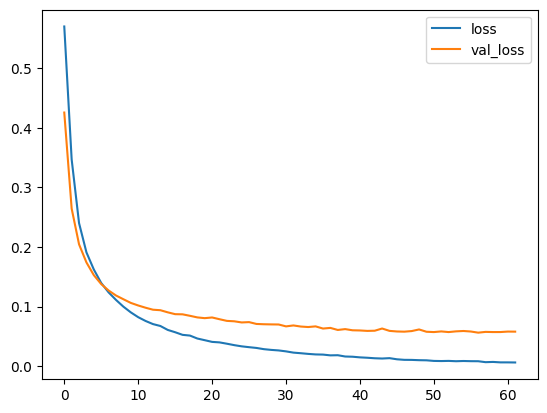

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

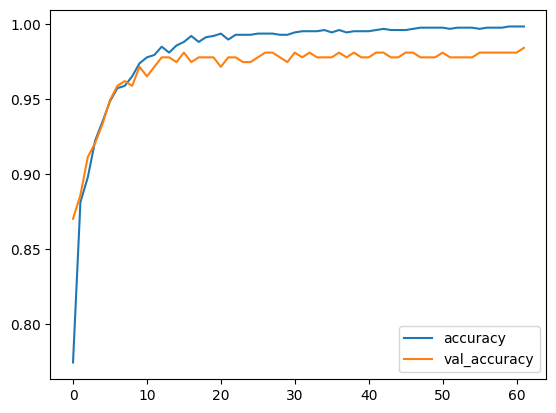

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [41]:
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [42]:
y_pred = (y_pred > 0.5).astype(int)

In [43]:
from sklearn.metrics import confusion_matrix

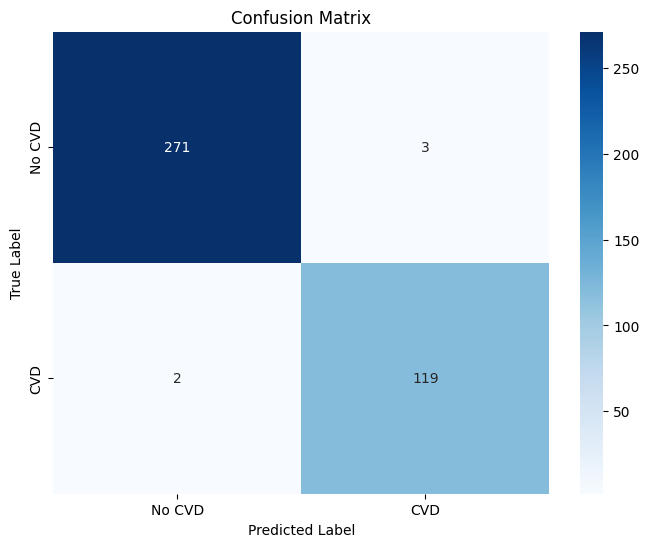

In [44]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       274
           1       0.98      0.98      0.98       121

    accuracy                           0.99       395
   macro avg       0.98      0.99      0.99       395
weighted avg       0.99      0.99      0.99       395

